# 유성분검사성적서 전처리

In [ ]:
# 1. 표준 라이브러리
import sys
from pathlib import Path
import platform

# 2. 서드파티 라이브러리 
# 2-1. 데이터 처리
import pandas as pd
import numpy as np

# 2-2. 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

# 3. 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import DATA_DIR, FONT_DIR
from utils import plot_features

# 2021년 원유 가격 기본가와 탈지분유 가격
RAW_PRICE = 947
LOW_PRICE = 300

In [2]:
# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams['axes.unicode_minus'] = False

# 로컬 폰트 지정
font_path = FONT_DIR / 'HakgyoansimBareondotumB.ttf'
fm.fontManager.addfont(str(font_path))
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 컬러 지정
colors = ["#0A4EE4", "#AED6E0", "#9BC4D5", "#5271B7", "#758A98", "#3E4E5F", "#5D3A99", "#9370DB"]


In [3]:
pandas_kwargs = {
    'memory_map': True,
    'parse_dates': ['검정일자', '출생일자', '최근분만일(연계)', '최근건유일(연계)', '최종수정일자(연계)', '가수제일자(연계)'],
    'date_format': '%Y%m%d',
    'dtype': {
        '개체번호': "Int64"
    }
}

data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '유성분검사성적서.csv', **pandas_kwargs)

/tmp/ipykernel_3072186/3805980079.py:10: DtypeWarning: Columns (30,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '유성분검사성적서.csv', **pandas_kwargs)


In [4]:
milk = data.copy()

## 중복 제거

In [5]:
display(milk.duplicated().sum())
milk.drop_duplicates(inplace=True)

np.int64(5516)

## 1차 Drop

In [6]:
# 결측치가 95% 이상인 열 삭제
nan_cols = [
    '착유일련번호', '혈통번호', '체점수(연계)', '유성분검사일련번호', '검정일시(ICT)', 
    '단백율', '고형율', '유당'
]

milk.drop(columns=nan_cols, inplace=True)

# 유의미하지 않은 열 삭제 (nunique, 의미상 다른 열과 겹침)
no_use_cols = [
    '분만나이(연계)', '데이터입력코드', '개체명', '최고유량체세포', '농장관리번호'
]
no_use_cols += [
    '성년유량','성년유지량', '성년유단백량', '성년무지고형분량', '비유초기평균유지율', '비유초기평균단백율', '비유초기평균MNU', '건유전마지막유량', '최종수정횟수(연계)', '가수제코드(연계)', '가수제일자(연계)'
]

milk.drop(columns=no_use_cols, inplace=True)

# 개체를 구분할 수 없는 행 삭제
milk.dropna(subset=['개체번호'], inplace=True)

# 기입이 이상한 농가 삭제
milk.drop(index=milk[milk['농장아이디'].isin([20278, 20402])].index, inplace=True)

milk

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,우유내요소태질소,305일유량,...,산차,최근분만일(연계),최근건유일(연계),농후사료비(연계),농후사료급여량(연계),공태일수,최종수정일자(연계),최종수정정액코드(연계),분만후첫수정일까지일수,유량
0,20249,20120709020022,2020-01-11,154,6.31,2.86,8.43,141,29.8,9714.0,...,6,2019-08-10,2020-04-07,0.0,0.0,204,2020-03-01,250HO13267,186.0,59950
1,20249,20120626020043,2020-01-11,457,0.00,0.00,0.00,0,0.0,14570.0,...,4,2018-08-25,2019-11-25,0.0,0.0,269,2019-05-21,7HO13250,127.0,59951
2,20249,20120504020095,2020-01-11,52,6.10,2.80,8.53,34,23.7,0.0,...,5,2019-11-20,2021-01-04,0.0,0.0,175,2020-05-13,200HO06480,64.0,59945
3,20249,20111008020210,2020-01-11,115,4.34,3.05,8.97,106,21.3,11008.0,...,5,2019-09-18,2020-11-07,0.0,0.0,215,2020-04-20,14HO07770,50.0,59947
4,20249,20121014020049,2020-01-11,290,5.56,3.70,9.23,220,21.7,11318.0,...,5,2019-03-27,2020-05-14,0.0,0.0,224,2019-11-06,7HO13250,180.0,59958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100544,20251,20210227010196,2022-02-04,0,0.00,0.00,0.00,0,0.0,0.0,...,0,NaT,NaT,0.0,0.0,0,NaT,NaN,NaN,95837378
100545,20251,20210310010197,2022-02-04,0,0.00,0.00,0.00,0,0.0,0.0,...,0,NaT,NaT,0.0,0.0,0,NaT,NaN,NaN,95837371
100546,20251,20210530010201,2022-02-04,0,0.00,0.00,0.00,0,0.0,0.0,...,0,NaT,NaT,0.0,0.0,0,NaT,NaN,NaN,95837351
100547,20251,20210609010202,2022-02-04,0,0.00,0.00,0.00,0,0.0,0.0,...,0,NaT,NaT,0.0,0.0,0,NaT,NaN,NaN,95837283


## 이상치 수정

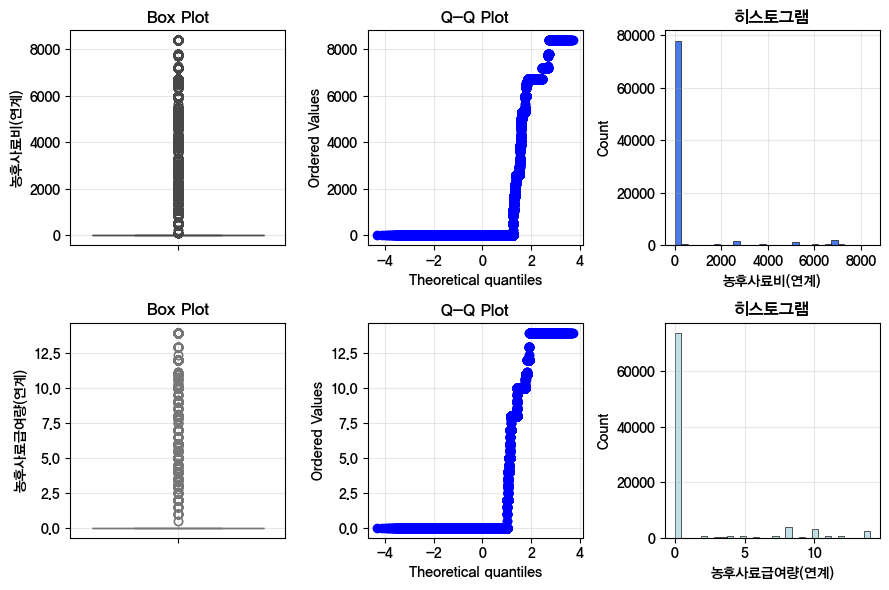

In [7]:
# 농후사료비는 가격 -> 마지막에 생산비 계산에 들어갈지도 모르니 일단은 남김 (피처로는 X)
milk.loc[milk['농후사료급여량(연계)'] == 50, '농후사료급여량(연계)'] = 5
milk.loc[milk['농후사료비(연계)'] == 27750, '농후사료비(연계)'] = 2275

plot_features(milk, ['농후사료비(연계)', '농후사료급여량(연계)'], colors=colors, bins=30)

## 날짜 관리

In [8]:
milk['수정시작일'] = milk['최근분만일(연계)'] + pd.to_timedelta((milk['분만후첫수정일까지일수']), unit='D')
milk['비유최고일'] = milk['최근분만일(연계)'] + pd.to_timedelta((milk['비유최고도달일수']), unit='D')

In [9]:
milk[milk['개체번호'] == 20130621010034]

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,우유내요소태질소,305일유량,...,최근건유일(연계),농후사료비(연계),농후사료급여량(연계),공태일수,최종수정일자(연계),최종수정정액코드(연계),분만후첫수정일까지일수,유량,수정시작일,비유최고일
20389,20446,20130621010034,2020-01-20,774,0.0,0.0,0.0,0,0.0,10169.0,...,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,15822598,2017-12-24,2017-09-20
20449,20446,20130621010034,2020-02-19,774,0.0,0.0,0.0,0,0.0,10169.0,...,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,15822682,2017-12-24,2017-09-20
20509,20446,20130621010034,2020-03-19,774,0.0,0.0,0.0,0,0.0,10169.0,...,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,15822731,2017-12-24,2017-09-20
20569,20446,20130621010034,2020-04-15,774,0.0,0.0,0.0,0,0.0,10169.0,...,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,15822825,2017-12-24,2017-09-20
20630,20446,20130621010034,2020-05-19,774,0.0,0.0,0.0,0,0.0,10169.0,...,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,15822904,2017-12-24,2017-09-20
20691,20446,20130621010034,2020-06-24,774,0.0,0.0,0.0,0,0.0,10169.0,...,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,15822933,2017-12-24,2017-09-20
20753,20446,20130621010034,2020-07-20,774,0.0,0.0,0.0,0,0.0,10169.0,...,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,15823034,2017-12-24,2017-09-20
20815,20446,20130621010034,2020-08-19,774,0.0,0.0,0.0,0,0.0,10169.0,...,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,15823126,2017-12-24,2017-09-20
20879,20446,20130621010034,2020-09-24,774,0.0,0.0,0.0,0,0.0,10169.0,...,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,15823157,2017-12-24,2017-09-20
20945,20446,20130621010034,2020-10-22,774,0.0,0.0,0.0,0,0.0,10169.0,...,2019-07-21,0.0,0.0,0,2019-02-28,200HO02792,200.0,15823238,2017-12-24,2017-09-20


In [10]:
# 중간에 최근 분만일이 비어있는 경우
mode_by_san = (
    milk.groupby(['농장아이디', '개체번호', '산차'])['최근분만일(연계)'].transform(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
)

milk['최근분만일(연계)'] = milk['최근분만일(연계)'].fillna(mode_by_san)

In [11]:
# 분만일이 있는 경우, 누적착유일을 검정일자 - 최근분만일로
cond = milk['최근분만일(연계)'].notna()
milk.loc[cond, '누적착유일(연계)'] = (milk.loc[cond, '검정일자'] - milk.loc[cond, '최근분만일(연계)']).dt.days.astype('Int64')
# 누적착유일이 존재하는데 최근분만일(연계)가 nan -> 채워넣기
cond = ~cond 
cond &= (milk['누적착유일(연계)'] != 0)
milk.loc[cond, '최근분만일(연계)'] = milk.loc[cond, '검정일자'] - pd.to_timedelta((milk.loc[cond, '누적착유일(연계)']), unit='D')

## 파생변수 생성

### 질병군 파생변수

In [12]:
# 날짜 기준 정렬
milk['검정일자'] = pd.to_datetime(milk['검정일자'], format="%Y%m%d")
milk['검정일자'] = pd.to_datetime(milk['검정일자'], format="%Y%m%d")
milk = milk.sort_values(['개체번호', '검정일자'])

# 개체별 전월 유량 가져오기
milk['전월유량'] = milk.groupby('개체번호')['유량'].shift(1)

# 유량 변화율 계산: ((현재 - 전월) / 전월) * 100
milk['유량변화율(%)'] = (milk['유량'] - milk['전월유량']) / milk['전월유량'] * 100

# 질병군 생성: 체세포수 ≥200 & 전월 대비 유량 10% 이상 감소 → 1(의심군), 나머지 0(정상군)
milk['질병군'] = np.where((milk['체세포수'] >= 200) & (milk['유량변화율(%)'] <= -10), 1, 0)

### 비유단계 파생변수

In [13]:
def level_map(row: pd.Series):
    test = row['검정일자']
    
    if test < row['수정시작일']:
        return 1 # '공태기'
    elif test < row['최종수정일자(연계)']:
        return 2 # '수정'
    elif test < row['최근건유일(연계)']:
        return 3 #'임신비유기'
    else:
        return 4 # '연장비유'
        

milk['비유단계'] = milk.apply(level_map, axis=1)

In [14]:
# 젖을 짜지 않는 건유기 or 송아지 삭제
milk.drop(index=milk[milk['유단백'] == 0].index, inplace=True)

In [15]:
milk['비유단계'].value_counts()

비유단계
3    13331
4    11169
2     8160
1     7604
Name: count, dtype: int64

### 계절 파생변수

In [16]:
milk['계절'] = milk['검정일자'].dt.month.apply(
    lambda x: 1 if x in [3, 4, 5] else 2 if x in [6, 7, 8]
        else 3 if x in [9, 10, 11] else 4
)

### 농장구분

In [17]:
pandas_kwargs = {
    'memory_map': True,
    'date_format': '%Y%m%d.0'
}

robot_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / '로봇착유기.csv', **pandas_kwargs)
ict_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'raw' / 'ICT착유기.csv', **pandas_kwargs)
robot_data

,농장아이디,개체번호,축산업등록번호,축종코드,제조사 아이디,장비코드,장비번호,측정일시,착유량,착유시작일시,...,색상,온도,유지방,유단백,공기흐름,수집구분,수집일자,수집건수,산차,반추시간
0,20278,20120112010022,NaN,D00,agrirobotech,NaN,NaN,2020-01-20 00:00:00.0,24,2020-01-20 00:00:00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20200120,1,6.0,414.0
1,20278,20120112010022,NaN,D00,agrirobotech,NaN,NaN,2020-01-21 00:00:00.0,28,2020-01-21 00:00:00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20200121,1,6.0,507.0
2,20278,20120112010022,NaN,D00,agrirobotech,NaN,NaN,2020-01-22 00:00:00.0,37,2020-01-22 00:00:00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20200122,1,6.0,516.0
3,20278,20120112010022,NaN,D00,agrirobotech,NaN,NaN,2020-01-23 00:00:00.0,43,2020-01-23 00:00:00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20200123,1,6.0,508.0
4,20278,20120112010022,NaN,D00,agrirobotech,NaN,NaN,2020-01-24 00:00:00.0,43,2020-01-24 00:00:00.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20200124,1,6.0,525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732655,20265,20190414010099,NaN,D00,agrirobotech,NaN,NaN,2022-11-08 12:46:46.0,9,2022-11-08 12:46:46.0,...,NaN,39.4,4.6,3.4,3.3,NaN,20221109,1,1.0,NaN
732656,20265,20190414010099,NaN,D00,agrirobotech,NaN,NaN,2022-11-09 01:26:34.0,9,2022-11-09 01:26:34.0,...,NaN,38.6,4.2,3.4,2.9,NaN,20221110,1,1.0,NaN
732657,20265,20190414010099,NaN,D00,agrirobotech,NaN,NaN,2022-11-09 09:41:34.0,6,2022-11-09 09:41:34.0,...,NaN,38.3,4.5,3.4,2.1,NaN,20221110,1,1.0,NaN
732658,20265,20190414010099,NaN,D00,agrirobotech,NaN,NaN,2022-11-09 21:26:42.0,9,2022-11-09 21:26:42.0,...,NaN,39.7,4.4,3.4,3.2,NaN,20221110,1,1.0,NaN


In [18]:
robot_farm = list(set(robot_data['농장아이디'].tolist()) & set(milk['농장아이디'].tolist()))
ict_farm = list(set(ict_data['농장아이디'].tolist()) & set(milk['농장아이디'].tolist()))

smart_farm = robot_farm + ict_farm
smart_farm

[20264,
 20265,
 21148,
 21133,
 21678,
 21134,
 21135,
 21686,
 20249,
 20250,
 20251,
 20446]

In [19]:
milk['농장구분'] = milk['농장아이디'].apply(lambda x: 1 if x in smart_farm else 0)

In [20]:
milk['농장구분'].value_counts()

농장구분
0    29470
1    10794
Name: count, dtype: int64

### 가격 파생변수

In [21]:
fat_price_table = pd.DataFrame({
    '유지방율': [3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1],
    '가격': [-103.00, -41.20, -30.90, -20.60, -10.30, 0.00, 10.30, 20.60, 30.90, 41.20, 51.50, 56.65]
})

def calculate_price(row: pd.Series):
    price = RAW_PRICE
    yudan = round(row['유단백'], 1)
    yuji = round(row['유지방율'], 1)
    shapo = row['체세포수']
    
    if row[['유단백', '유지방율', '체세포수']].isnull().sum() != 0:
        return np.nan
    
    if yuji <= 3.0:
        price += -103.0
    elif yuji >= 4.1:
        price += 56.65
    else:
        price += np.interp(yuji, fat_price_table['유지방율'], fat_price_table['가격'])
    
    if yudan < 3.0:
        pass
    elif yudan == 3.0:
        price += 4.0
    elif yudan == 3.1:
        price += 11.65
    else:
        price += 19.41
    
    if shapo < 200:
        price += 52.69
    elif shapo < 350:
        price += 39.25
    else:
        price = LOW_PRICE
    
    return round(price, 2)

In [22]:
milk['가격'] = milk.apply(calculate_price, axis=1)
milk['가격'].value_counts(dropna=False)

가격
1075.75    13420
300.00      4308
1062.31     1897
1056.34     1537
1067.99     1416
           ...  
949.05        10
959.35        10
977.30        10
979.95         9
956.70         2
Name: count, Length: 97, dtype: int64

In [23]:
milk['가격미달'] = (milk['가격'] == 300).astype(int)

In [24]:
milk['가격미달'] = milk['가격'].apply(lambda x: 1 if x == LOW_PRICE else 0)

milk['가격미달'].value_counts()

가격미달
0    35956
1     4308
Name: count, dtype: int64

35956 40264


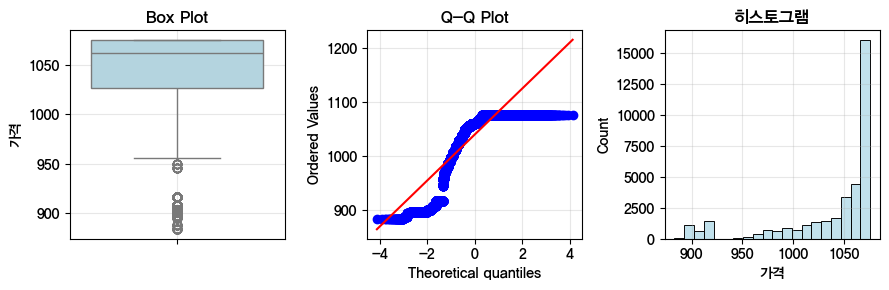

In [25]:
temp = milk[milk['가격'] > 300]
print(temp.shape[0], milk.shape[0])
plot_features(temp, ['가격'], colors=['lightblue'], bins=20)

### 분만간격, 분만월령 파생변수

In [26]:
# NaN이 아닌 값들에 대해서만 계산
milk['분만간격'] = milk.groupby(['농장아이디', '개체번호'])['최근분만일(연계)'].transform(
    lambda x: x.dt.days if pd.api.types.is_timedelta64_dtype(x) 
    else x.dropna().diff().dt.days
)

# 같은 날짜가 연속될 때 (차이 0)를 NaN으로 변경
milk.loc[milk['분만간격'] == 0, '분만간격'] = np.nan
# 그룹 내에서 NaN을 앞의 값으로 채우기
milk['분만간격'] = milk.groupby(['농장아이디', '개체번호'])['분만간격'].ffill()

In [27]:
milk['분만간격'].value_counts(dropna=False, normalize=True).mul(100).round(1)

분만간격
NaN      59.8
343.0     0.4
364.0     0.4
324.0     0.4
404.0     0.4
         ... 
607.0     0.0
772.0     0.0
685.0     0.0
604.0     0.0
270.0     0.0
Name: proportion, Length: 420, dtype: float64

In [28]:
milk['분만월령'] = (milk['최근분만일(연계)'].dt.to_period('M') - milk['출생일자'].dt.to_period('M')).apply(lambda x: x.n if pd.notna(x) else np.nan)
milk['분만월령']

69280    144.0
69413    144.0
69551    144.0
69689    144.0
69827    144.0
         ...  
85748     25.0
85669     26.0
85749     26.0
85672     26.0
85752     26.0
Name: 분만월령, Length: 40264, dtype: float64

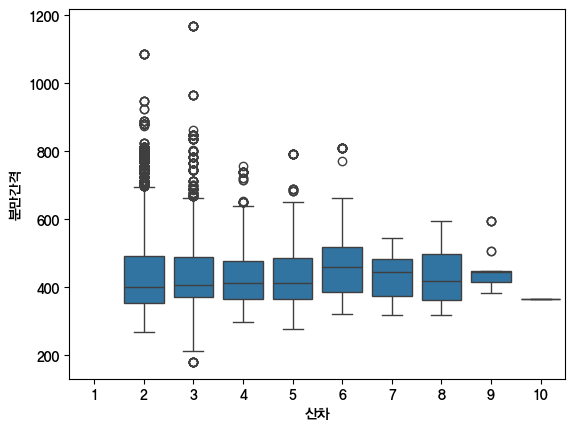

In [29]:
sns.boxplot(milk, x='산차', y='분만간격')
plt.show()

## 전산차비유지속성 전처리

In [30]:
# 농장아이디, 개체번호마다
# 2번째 산차부터 -> rank > 1
# 0인 전산차비유지속성 -> np.nan
# 전산차가 존재하는데 비유지속성 기록이 안된 것으로 보이는 0값들을 nan으로 처리

milk['산차랭크'] = milk.groupby(['농장아이디', '개체번호'])['산차'].rank('dense')
series_gun = ['전산차비유지속성', '전산차건유전유량']

for col in series_gun:    
    cond = milk['산차랭크'] > 1
    cond = milk[col] == 0
    milk.loc[cond, col] = np.nan

milk['전산차비유지속성'].value_counts(normalize=True, dropna=False).mul(100).round(1)

전산차비유지속성
NaN      56.2
82.6      0.3
100.0     0.2
80.0      0.2
88.2      0.2
         ... 
36.0      0.0
115.2     0.0
40.6      0.0
27.2      0.0
85.9      0.0
Name: proportion, Length: 777, dtype: float64

## 2차 Drop (누수 없이 설정하기)

In [31]:
milk.columns

Index(['농장아이디', '개체번호', '검정일자', '누적착유일(연계)', '유지방율', '유단백', '무지고형분', '체세포수',
       '우유내요소태질소', '305일유량', '305일유지량', '305일유단백', '305일무지고형분', '전산차비유지속성',
       '현재산차비유지속성', '비유최고도달일수', '비유후기최고유량', '전산차건유전유량', '출생일자', '산차',
       '최근분만일(연계)', '최근건유일(연계)', '농후사료비(연계)', '농후사료급여량(연계)', '공태일수',
       '최종수정일자(연계)', '최종수정정액코드(연계)', '분만후첫수정일까지일수', '유량', '수정시작일', '비유최고일',
       '전월유량', '유량변화율(%)', '질병군', '비유단계', '계절', '농장구분', '가격', '가격미달', '분만간격',
       '분만월령', '산차랭크'],
      dtype='object')

In [32]:
dropped = milk.copy()

In [33]:
# 누수 있는 행을 nan으로 (공태일수, 최종수정일자)
cond = dropped['검정일자'] < dropped['최종수정일자(연계)']
dropped.loc[cond, ['공태일수']] = np.nan

# 날짜 제거
date_cols = ['최근분만일(연계)', '최근건유일(연계)', '최종수정일자(연계)', '수정시작일', '비유최고일']
dropped.drop(columns=date_cols, inplace=True)

# 자체로 데이터 누수인 컬럼 제거
drop_cols = ['현재산차비유지속성', '비유최고도달일수', '비유후기최고유량']
dropped.drop(columns=drop_cols, inplace=True)

# 대체된 컬럼 제거
replace_cols = ['최종수정정액코드(연계)', '산차랭크', '전월유량', '유량변화율(%)', '유량']
dropped.drop(columns=replace_cols, inplace=True)

In [34]:
dropped.columns

Index(['농장아이디', '개체번호', '검정일자', '누적착유일(연계)', '유지방율', '유단백', '무지고형분', '체세포수',
       '우유내요소태질소', '305일유량', '305일유지량', '305일유단백', '305일무지고형분', '전산차비유지속성',
       '전산차건유전유량', '출생일자', '산차', '농후사료비(연계)', '농후사료급여량(연계)', '공태일수',
       '분만후첫수정일까지일수', '질병군', '비유단계', '계절', '농장구분', '가격', '가격미달', '분만간격',
       '분만월령'],
      dtype='object')

In [35]:
def replace_nan_series(data, series):
    nan_cond = True
    for col in series:
        nan_cond &= data[col] == 0
    print(len(data.loc[nan_cond, col]))
    
    data.loc[nan_cond, series] = data.loc[nan_cond, col].replace(0, np.nan)

In [36]:
# 시리즈끼리 전부 0인 값 nan으로 대체
series_305 = ['305일유량', '305일무지고형분']

series_lst = [series_305, series_gun]

for series in series_lst:
    replace_nan_series(dropped, series)

8498
0


In [38]:
dropped['전산차비유지속성'].value_counts(normalize=True, dropna=False)

전산차비유지속성
NaN      0.562438
82.6     0.002508
100.0    0.002285
80.0     0.002012
88.2     0.001962
           ...   
36.0     0.000025
115.2    0.000025
40.6     0.000025
27.2     0.000025
85.9     0.000025
Name: proportion, Length: 777, dtype: float64

## 이름 고치기

In [39]:
dropped.rename(columns={
    '우유내요소태질소': 'MUN',
}, inplace=True)

In [40]:
dropped.isnull().sum()

농장아이디              0
개체번호               0
검정일자               0
누적착유일(연계)          0
유지방율               0
유단백                0
무지고형분              0
체세포수               0
MUN                0
305일유량          8498
305일유지량            0
305일유단백            0
305일무지고형분       8498
전산차비유지속성       22646
전산차건유전유량       15543
출생일자               0
산차                 0
농후사료비(연계)          0
농후사료급여량(연계)        0
공태일수           15726
분만후첫수정일까지일수     2731
질병군                0
비유단계               0
계절                 0
농장구분               0
가격                 0
가격미달               0
분만간격           24069
분만월령               1
dtype: int64

In [41]:
dropped.to_csv(DATA_DIR / "processed" / "milk.csv", index=False, encoding="utf-8")